In [535]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [536]:
print(boston.data.shape)

(506, 13)


In [537]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [538]:
import numpy as np
import pandas as pd
 
X = pd.DataFrame(boston.data,columns=boston.feature_names)
print(X.head())
Y = pd.DataFrame(boston.target)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Ex. 1 Split train-test dataset

In [539]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex. 2 Linear regression.

In [540]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
Y_pred = lin_reg.predict(X_test)
Y_train_pred = lin_reg.predict(X_train)

How should an ideal scatter look like?

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

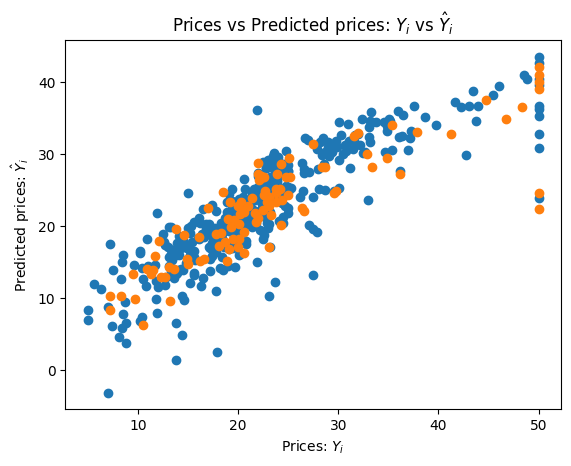

In [541]:
plt.scatter(y_train, Y_train_pred)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Ideal scatter plot would have every point on straight line y = x.

Ex. 3: To check the level of error of a model calculate the Mean Squared Error.

In [542]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(Y_pred,y_test)
print(f"MSE = {mse}")

MSE = 30.35959106441524


Ex. 4: Calculate the model.score. Check what it is for linear problems.

In [543]:
lin_reg.score(X_test,y_test)

0.7129550216909384

In [544]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
scaler = StandardScaler()
scaler.fit(Y)
Y_norm = scaler.transform(Y)

from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_norm)
X_train,X_test,y_train,y_test = train_test_split(X_poly,Y_norm,test_size = 0.2)


In [545]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
Y_pred = lin_reg.predict(X_test)
Y_train_pred = lin_reg.predict(X_train)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

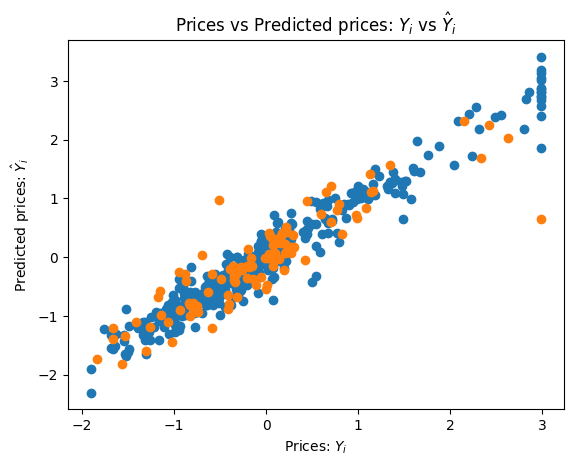

In [546]:
plt.scatter(y_train, Y_train_pred)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [547]:
mse = sklearn.metrics.mean_squared_error(Y_pred,y_test)
print(f"MSE = {mse}")
print(f"score = {lin_reg.score(X_test,y_test)}")

MSE = 0.15950367123549458
score = 0.8022018372771548


In [548]:
from sklearn.linear_model import Ridge, Lasso
from copy import deepcopy

Ex. 5: Lasso

C:\Users\nikos\AppData\Local\Temp\ipykernel_19648\594096019.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e+01, tolerance: 4.232e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

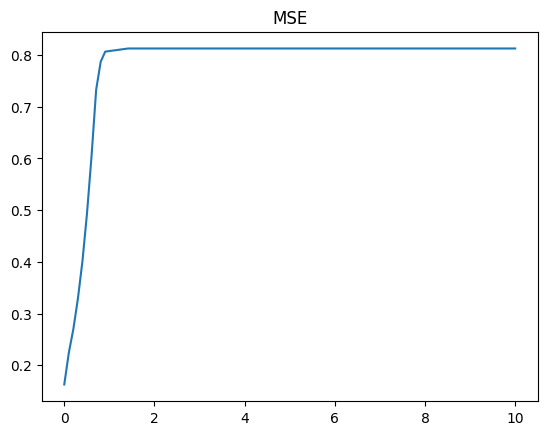

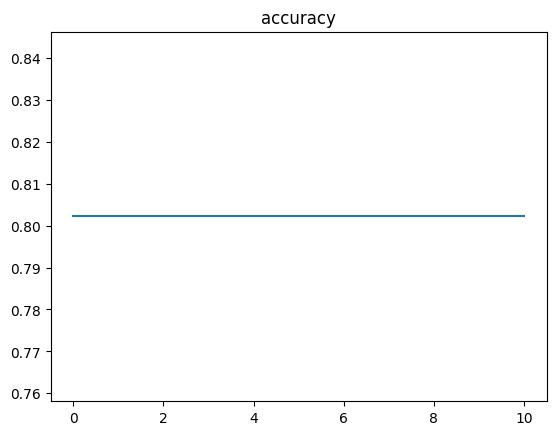

In [549]:
alpha = np.linspace(0,10,100)
mse_lst = []
acc_lst = []
for i in alpha:
    lasso = Lasso(alpha= i)
    lasso.fit(X_train,y_train)
    Y_pred = lasso.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(Y_pred,y_test)
    mse_lst.append(mse)
    acc_lst.append(deepcopy(lin_reg.score(X_test,y_test)))
plt.plot(alpha,mse_lst)
plt.title("MSE")
plt.show()
plt.title("accuracy")
plt.plot(alpha,acc_lst)
plt.show()

Ex. 6: Ridge

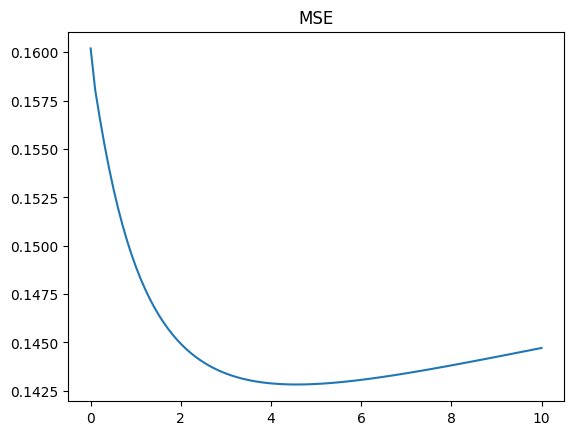

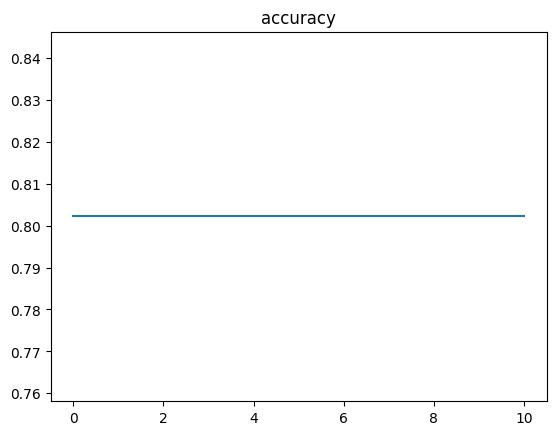

In [550]:
alpha = np.linspace(0,10,100)
mse_lst = []
acc_lst = []
for i in alpha:
    ridge = Ridge(alpha= i)
    ridge.fit(X_train,y_train)
    Y_pred = ridge.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(Y_pred,y_test)
    mse_lst.append(mse)
    acc_lst.append(deepcopy(lin_reg.score(X_test,y_test)))
plt.plot(alpha,mse_lst)
plt.title("MSE")
plt.show()
plt.title("accuracy")
plt.plot(alpha,acc_lst)
plt.show()  

Regularization for logistic regression

In [551]:
path = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
dataset = pd.read_csv(path, na_values='?', dtype={'ID': str})
dataset.columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [552]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    object 
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    object 
dtypes: float64(1), int64(8), object(2)
memory usage: 60.2+ KB


Ex. 1: Using function .isnull() check wether the database contains missing values.
Please fill the missing values with mean values for giving class.

In [553]:
dataset.isnull().any()

ID                             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [554]:
dataset["Bare Nuclei"] = dataset["Bare Nuclei"].fillna(dataset.groupby('Class')["Bare Nuclei"].transform('mean'))

In [555]:
dataset.isnull().any()

ID                             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

Ex. 2: Divide the dataset into training and testing. Remove the first column containing the ID of the examined person.

In [556]:
dataset.drop(columns=["ID"])

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,benign
695,2,1,1,1,2,1.0,1,1,1,benign
696,5,10,10,3,7,3.0,8,10,2,malignant
697,4,8,6,4,3,4.0,10,6,1,malignant


In [557]:
dataset["Class"] = dataset["Class"].replace("benign",0)
dataset["Class"] = dataset["Class"].replace("malignant",1)

In [558]:
X_train,X_test,y_train,y_test = train_test_split(dataset.drop(columns=["Class"]),dataset["Class"],test_size = 0.2)

Ex. 3: Using the available libraries in Python, create a logistic regression model with L1 regularization and C = 1 regularization parameter.

In [559]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1,solver='liblinear')
log_reg.fit(X_train,y_train)
Y_pred = log_reg.predict(X_test)

In [560]:
import sklearn.metrics as metrics
print("accuracy",metrics.accuracy_score(y_test,Y_pred))
print(f"recal: {metrics.recall_score(y_test,Y_pred,average='macro')}")
print(f"precision: {metrics.precision_score(y_test,Y_pred,average='macro')}")
print(f"F1: {metrics.f1_score(y_test,Y_pred,average='macro')}")

accuracy 0.95
recal: 0.9450757575757576
precision: 0.939766081871345
F1: 0.9423495499735279


Ex. 4: Draw a plot of the algorithm accuracy for the L2 regularization (10 values of the regularization parameter C in the following range [0.0001; 1])

In [561]:
C = np.linspace(0.0001,1.0,10)
accuracy = []
for i in C:
    log_reg = LogisticRegression(penalty='l2',C=i,solver='newton-cg')
    log_reg.fit(X_train,y_train)
    Y_pred = log_reg.predict(X_test)
    accuracy.append(float(metrics.accuracy_score(y_test,Y_pred)))

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The li

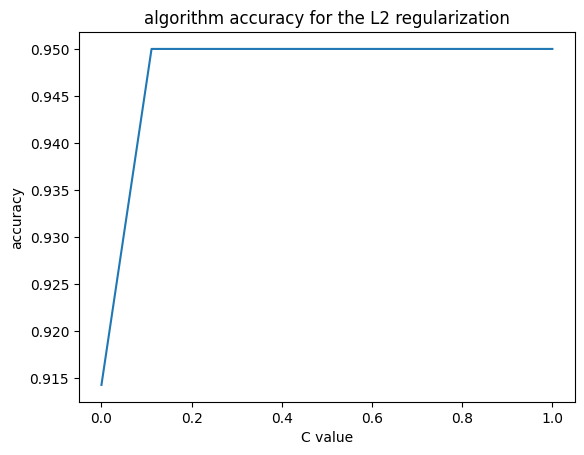

In [562]:
plt.plot(C,accuracy)
plt.title("algorithm accuracy for the L2 regularization")
plt.xlabel("C value")
plt.ylabel("accuracy")
plt.show()